In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
avo = pd.read_csv('C:\\Games\\Datasets\\avocado.csv')
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
avo.shape

(18249, 14)

In [4]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
avo['Date'] = pd.to_datetime(avo['Date'])

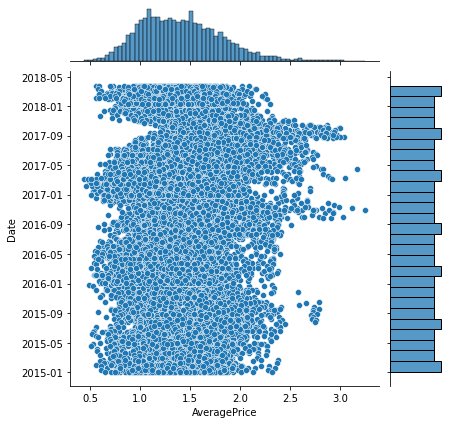

In [6]:
sns.jointplot(y = 'Date', x = 'AveragePrice', data = avo)

In [7]:
avo['Month'] = avo['Date'].apply(lambda x: x.month)

In [8]:
avo['Month'].head(20)

0     12
1     12
2     12
3     12
4     11
5     11
6     11
7     11
8     11
9     10
10    10
11    10
12    10
13     9
14     9
15     9
16     9
17     8
18     8
19     8
Name: Month, dtype: int64

In [9]:
avo['Day'] = avo['Date'].apply(lambda x: x.day)

In [10]:
avo['Day'].head(20)

0     27
1     20
2     13
3      6
4     29
5     22
6     15
7      8
8      1
9     25
10    18
11    11
12     4
13    27
14    20
15    13
16     6
17    30
18    23
19    16
Name: Day, dtype: int64

In [14]:
avo_pre = avo.drop(['Unnamed: 0', 'Date'], axis = 1)

In [15]:
avo_pre.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


<AxesSubplot:>

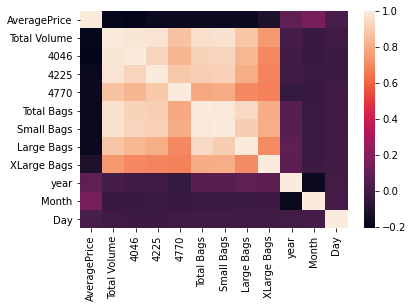

In [16]:
sns.heatmap(avo_pre.corr())

In [17]:
avo_pre.drop(['Total Volume', 'Total Bags'], axis = 1, inplace = True)

In [18]:
avo_pre.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder

In [20]:
X_train, X_test, y_train, y_test = train_test_split(avo_pre.drop('AveragePrice', axis = 1), 
                                                    avo_pre['AveragePrice'], 
                                                    random_state = 42)

In [21]:
cat_columns = ['type', 'year', 'region', 'Month', 'Day']
num_columns = ['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']

In [22]:
cat_pipe = Pipeline([('ohe', OneHotEncoder(sparse = False, handle_unknown = 'ignore'))])
num_pipe = Pipeline([('yeo-johnson', PowerTransformer())])

In [23]:
transformers = [('num', num_pipe, num_columns), ('cat', cat_pipe, cat_columns)]

In [24]:
ct = ColumnTransformer(transformers = transformers)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [26]:
ml_pipe = Pipeline([('transform', ct), ('forest', RandomForestRegressor())])
ml_pipe_2 = Pipeline([('transform', ct), ('linreg', LinearRegression())])
ml_pipe_3 = Pipeline([('transform', ct), ('xgb', XGBRegressor())])

In [27]:
param_grid = {'forest__max_depth': range(5, 15), 'forest__n_estimators': [50, 100]}
param_grid_2 = {}
param_grid_3 = {'xgb__max_depth': range(3, 10), 'xgb__gamma': range(0,5)}

In [28]:
gs = GridSearchCV(ml_pipe, param_grid, cv = 5, return_train_score = False)
gs_2 = GridSearchCV(ml_pipe_2, param_grid_2, cv = 5, return_train_score = False)
gs_3 = GridSearchCV(ml_pipe_3, param_grid_3, cv = 5, return_train_score = False)

In [29]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('yeo-johnson',
                                                                                          PowerTransformer())]),
                                                                         ['4046',
                                                                          '4225',
                                                                          '4770',
                                                                          'Small '
                                                                          'Bags',
                                                                          'Large '
                                                                          'Bags',
                                                      

In [30]:
gs.best_params_

{'forest__max_depth': 14, 'forest__n_estimators': 100}

In [31]:
gs.best_score_

0.8420912377505709

In [32]:
gs_2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('yeo-johnson',
                                                                                          PowerTransformer())]),
                                                                         ['4046',
                                                                          '4225',
                                                                          '4770',
                                                                          'Small '
                                                                          'Bags',
                                                                          'Large '
                                                                          'Bags',
                                                      

In [34]:
gs_2.best_score_

0.6832064090215515

In [35]:
gs_3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('yeo-johnson',
                                                                                          PowerTransformer())]),
                                                                         ['4046',
                                                                          '4225',
                                                                          '4770',
                                                                          'Small '
                                                                          'Bags',
                                                                          'Large '
                                                                          'Bags',
                                                      

In [36]:
gs_3.best_params_

{'xgb__gamma': 0, 'xgb__max_depth': 9}

In [37]:
gs_3.best_score_

0.8997111246429667

In [38]:
gs_3.score(X_test, y_test)

0.9129858968551775

In [39]:
gs.score(X_test, y_test)

0.8502215682096198